# 9. CSV 文件和 csv 模块

什么是csv（Comma-Separated Values），也叫逗号分割值，如果你安装了excel，默认会用excel打开csv文件

标准库中有自带的 `csv` (逗号分隔值) 模块处理 `csv` 格式的文件：

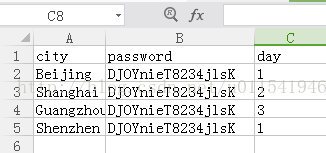

In [4]:
import csv

## 9.1 读 csv 文件

假设我们有这样的一个文件：

In [5]:
%%file data.csv
"alpha 1",  100, -1.443
"beat  3",   12, -0.0934
"gamma 3a", 192, -0.6621
"delta 2a",  15, -4.515

Overwriting data.csv


打开这个文件，并产生一个文件 reader：

In [6]:
fp = open("data.csv")
r = csv.reader(fp)

可以按行迭代数据：

In [7]:
for row in r:
    print(row)
    
fp.close()

['alpha 1', '  100', ' -1.443']
['beat  3', '   12', ' -0.0934']
['gamma 3a', ' 192', ' -0.6621']
['delta 2a', '  15', ' -4.515']


默认数据内容都被当作字符串处理，不过可以自己进行处理：

In [8]:
data = []

with open('data.csv') as fp:
    r = csv.reader(fp)
    for row in r:
        data.append([row[0], int(row[1]), float(row[2])])
    
print(data)

[['alpha 1', 100, -1.443], ['beat  3', 12, -0.0934], ['gamma 3a', 192, -0.6621], ['delta 2a', 15, -4.515]]


In [9]:
import os
os.remove('data.csv')

## 9.2 写 csv 文件

可以使用 `csv.writer` 写入文件，不过相应地，传入的应该是以写方式打开的文件，不过一般要用 `'w'`，防止出现换行不正确的问题：

In [18]:
data = [('one', 1, 1.5), ('two', 2, 8.0)]
with open('out.csv', 'w') as fp:
    w = csv.writer(fp)
    w.writerow(data)

显示结果：

In [ ]:
# !cat 'out.csv'  # linux下的命令

In [24]:
!type out.csv  # windows

"one, ""real"" string",1,1.5

two,2,8.0



In [19]:
import csv 
with open('eggs.csv', 'w', newline='') as csvfile: 
    spamwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL) 
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])

## 9.3 更换分隔符

默认情况下，`csv` 模块默认 `csv` 文件都是由 `excel` 产生的，实际中可能会遇到这样的问题：

In [21]:
data = [('one, \"real\" string', 1, 1.5), ('two', 2, 8.0)]
with open('out.csv', 'w') as fp:
    w = csv.writer(fp)
    w.writerows(data)

In [23]:
# !cat 'out.csv'
!type out.csv

"one, ""real"" string",1,1.5

two,2,8.0



可以修改分隔符来处理这组数据：

In [32]:
data = [('one, \"real\" string', 1, 1.5), ('two', 2, 8.0)]
with open('out.psv', 'w') as fp:
    w = csv.writer(fp, delimiter="|")
    w.writerows(data)

In [27]:
import os
os.remove('out.psv')
os.remove('out.csv')

## 9.4 其他选项

`numpy.loadtxt()` 和 `pandas.read_csv()` 可以用来读写包含很多数值数据的 `csv` 文件：

In [28]:
%%file trades.csv
Order,Date,Stock,Quantity,Price
A0001,2013-12-01,AAPL,1000,203.4
A0002,2013-12-01,MSFT,1500,167.5
A0003,2013-12-02,GOOG,1500,167.5

Writing trades.csv


使用 `pandas` 进行处理，生成一个 `DataFrame` 对象：

In [29]:
import pandas
df = pandas.read_csv('trades.csv', index_col=0)
print(df)

             Date Stock  Quantity  Price
Order                                   
A0001  2013-12-01  AAPL      1000  203.4
A0002  2013-12-01  MSFT      1500  167.5
A0003  2013-12-02  GOOG      1500  167.5


通过名字进行索引：

In [30]:
df['Quantity'] * df['Price']

Order
A0001    203400.0
A0002    251250.0
A0003    251250.0
dtype: float64

In [31]:
import os
os.remove('trades.csv')